In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import networkx as nx
import matplotlib.pyplot as plt
from random import randint


In [2]:
import pandas as pd

file_path = "/content/metadata.csv"

df = pd.read_csv("/content/metadata.csv",encoding='ISO-8859-1', error_bad_lines=False, warn_bad_lines=False,engine="python")


<ipython-input-2-384b4d141853>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/metadata.csv",encoding='ISO-8859-1', error_bad_lines=False, warn_bad_lines=False,engine="python")
<ipython-input-2-384b4d141853>:5: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/metadata.csv",encoding='ISO-8859-1', error_bad_lines=False, warn_bad_lines=False,engine="python")


In [3]:
df

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381060,8lqtc8hm,NaN,WHO,"Early use of ICD-10-CM CODE ""U071, COVID-19"" t...",NaN,NaN,NaN,unk,This report describes early exploratory analys...,2020,"Clausen, S.; Stahlman, S.; Cost, A.",Medical Surveillance Monthly Report,NaN,#823788,NaN,NaN,NaN,NaN,226429260.0
381061,6vaddka6,NaN,WHO,The Development of an Academic Engagement Inte...,NaN,NaN,NaN,unk,"""Reclaim the W"" is an academic recovery progra...",2020,"Beasley, Samuel T; Vandiver, Beverly J; Dillar...",Innov High Educ,NaN,#361452,NaN,NaN,NaN,NaN,218890050.0
381062,xao0i79n,NaN,WHO,Impact of covid 19 on hematological parameters...,NaN,NaN,NaN,unk,Aims & Objectives: To analyze various hematolo...,2020,"Anegundi, R.; Rajeshwari, T.; Arathi, C. A.",Indian Journal of Hematology and Blood Transfu...,NaN,#1092776,NaN,NaN,NaN,NaN,234547188.0
381063,zzzom7an,NaN,WHO,[Routine vaccinations during SARS-CoV-2 epidem...,NaN,NaN,NaN,unk,The circulation of SARS-CoV-2 required the dep...,2020,"Amadori, F.; Terracciano, E.; Zaratti, L.; Fra...",Ig Sanita Pubbl,NaN,#903455,NaN,NaN,NaN,NaN,226249710.0


In [4]:
df.shape

(381065, 19)

In [5]:
df=df[:10000]

In [6]:
feature_names = df.columns
print("Feature Names:")
for feature in feature_names:
    print(feature)

Feature Names:
cord_uid
sha
source_x
title
doi
pmcid
pubmed_id
license
abstract
publish_time
authors
journal
mag_id
who_covidence_id
arxiv_id
pdf_json_files
pmc_json_files
url
s2_id


In [7]:
df.isnull().sum()

cord_uid                0
sha                   990
source_x                0
title                   0
doi                     0
pmcid                   0
pubmed_id               0
license                 0
abstract             2145
publish_time            0
authors               594
journal                47
mag_id              10000
who_covidence_id    10000
arxiv_id            10000
pdf_json_files        990
pmc_json_files       3218
url                     0
s2_id               10000
dtype: int64

In [8]:
df=df.drop(["mag_id","who_covidence_id","arxiv_id","s2_id"],axis=1)

In [9]:
df = df.dropna(subset=['authors'])

In [10]:
df.isnull().sum()

cord_uid             0
sha                734
source_x             0
title                0
doi                  0
pmcid                0
pubmed_id            0
license              0
abstract          1590
publish_time         0
authors              0
journal             46
pdf_json_files     734
pmc_json_files    2651
url                  0
dtype: int64

In [11]:

# Split the "authors" column into a list of authors
df['author_list'] = df['authors'].str.replace(';', ',').str.split(',')

# Create a list to store pairs of authors
author_pairs = []

# Iterate over the DataFrame to find pairs of authors for each paper
for _, row in df.iterrows():
    authors = row['author_list']
    if authors:
        # Create pairs of authors using combinations
        author_pairs.extend([(authors[i].strip(), authors[j].strip()) for i in range(len(authors)) for j in range(i + 1, len(authors))])

# Create a new DataFrame with author pairs
df_author_pairs = pd.DataFrame(author_pairs, columns=['Author1', 'Author2'])

# Display the DataFrame with author pairs
print(df_author_pairs)

                  Author1          Author2
0                  Madani          Tariq A
1                  Madani        Al-Ghamdi
2                  Madani          Aisha A
3                 Tariq A        Al-Ghamdi
4                 Tariq A          Aisha A
...                   ...              ...
16337614         Wolswijk  LopesâCardozo
16337615         Wolswijk               M.
16337616               G.  LopesâCardozo
16337617               G.               M.
16337618  LopesâCardozo               M.

[16337619 rows x 2 columns]


In [12]:
df_author_pairs=df_author_pairs[:800000]

In [13]:
df_author_pairs

,Author1,Author2
0,Madani,Tariq A
1,Madani,Al-Ghamdi
2,Madani,Aisha A
3,Tariq A,Al-Ghamdi
4,Tariq A,Aisha A
...,...,...
799995,Al-Sayyad,Mohammed
799996,Al-Sayyad,Hassan
799997,Al-Sayyad,Syed A.
799998,Al-Sayyad,Tayubi


In [14]:
import pandas as pd

df_author_pairs.to_csv('author_data.csv', index=False)  # Set index=False if you don't want to save the DataFrame index


In [1]:
import pandas as pd

In [5]:
df_author_pairs=pd.read_csv('author_data (1).csv')

In [9]:
G = nx.from_pandas_edgelist(df_author_pairs, "Author1", "Author2")

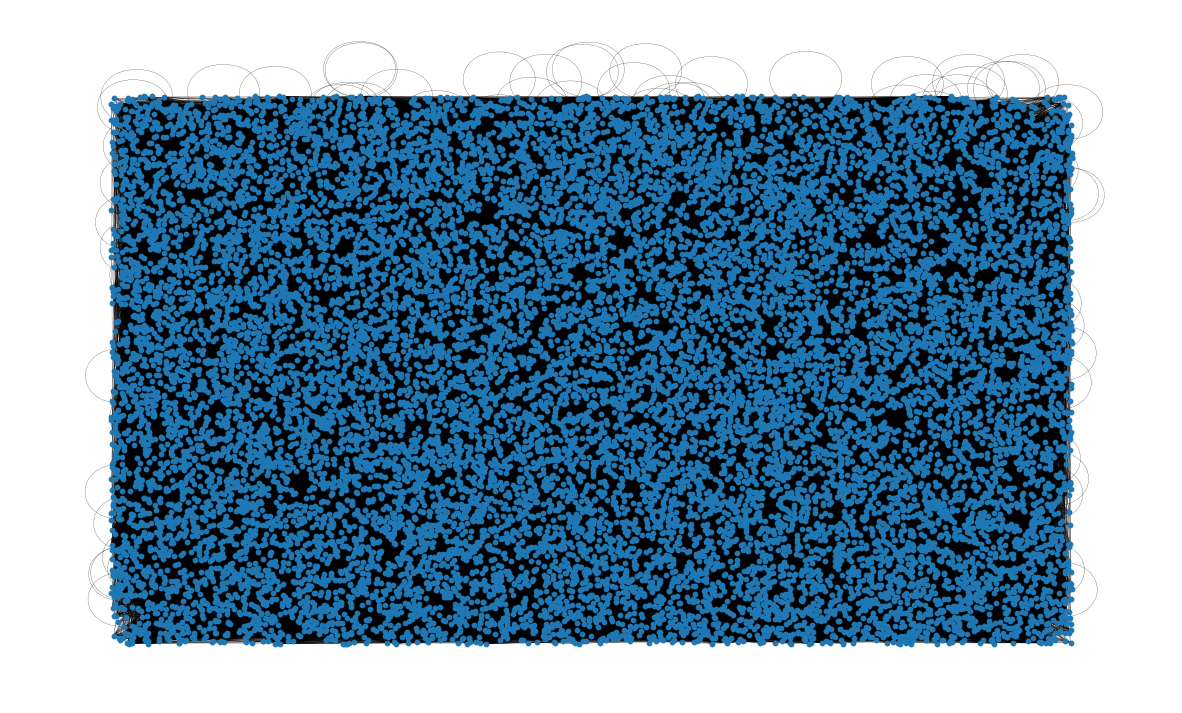

In [10]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

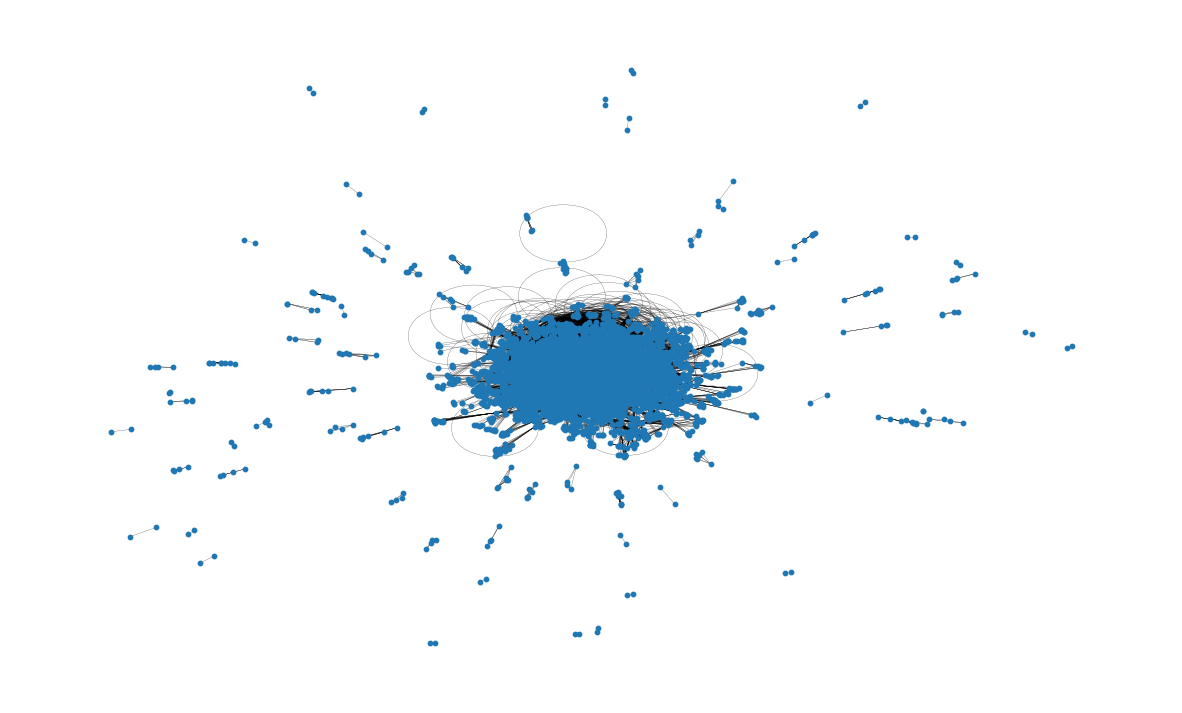

In [12]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [13]:
df=df_author_pairs

In [14]:
df

,Author1,Author2
0,Madani,Tariq A
1,Madani,Al-Ghamdi
2,Madani,Aisha A
3,Tariq A,Al-Ghamdi
4,Tariq A,Aisha A
...,...,...
799995,Al-Sayyad,Mohammed
799996,Al-Sayyad,Hassan
799997,Al-Sayyad,Syed A.
799998,Al-Sayyad,Tayubi


In [15]:
label_encoder = LabelEncoder()

# Combine Author1 and Author2 columns and fit_transform to convert names into integers
authors_combined = df['Author1'].astype(str) + ' ' + df['Author2'].astype(str)
encoded_authors = label_encoder.fit_transform(authors_combined)

# Add the encoded authors as new columns in the DataFrame
df['Author1_ID'] = encoded_authors
df['Author2_ID'] = encoded_authors

# Drop the original 'Author1' and 'Author2' columns
df = df.drop(['Author1', 'Author2'], axis=1)

# Now df contains only the numeric labels without the original author names
print(df[['Author1_ID', 'Author2_ID']])

        Author1_ID  Author2_ID
0           262327      262327
1           262326      262326
2           262325      262325
3           426367      426367
4           426366      426366
...            ...         ...
799995       22267       22267
799996       22147       22147
799997       22403       22403
799998       22410       22410
799999       22165       22165

[800000 rows x 2 columns]


In [16]:
df

,Author1_ID,Author2_ID
0,262327,262327
1,262326,262326
2,262325,262325
3,426367,426367
4,426366,426366
...,...,...
799995,22267,22267
799996,22147,22147
799997,22403,22403
799998,22410,22410


In [17]:
G = nx.from_pandas_edgelist(df, "Author1_ID", "Author2_ID")

In [18]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

KeyboardInterrupt: 

In [19]:
print("Number of nodes:",G.number_of_nodes())
print("Number of edges:",G.number_of_edges())

Number of nodes: 488937
Number of edges: 488937


In [21]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [22]:
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

NetworkXError: Found infinite path length because the graph is not connected

In [23]:
average_degree = sum(dict(G.degree()).values()) / len(G.nodes)
print("Average Degree:", average_degree)

Average Degree: 2.0


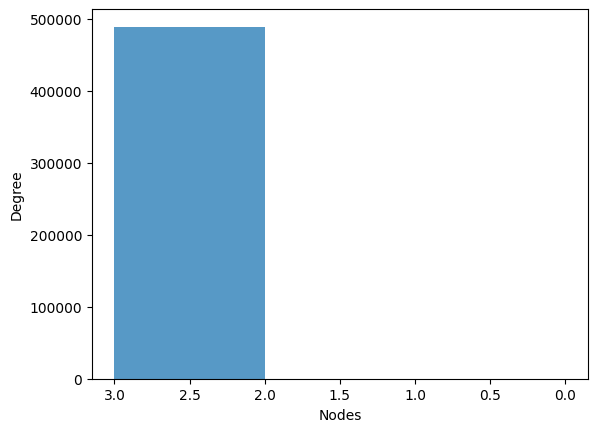

In [24]:

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Create the histogram
plt.hist(degree_sequence, bins=range(max(degree_sequence)+2), density=False, alpha=0.75)

# Set the x-axis and y-axis labels
plt.xlabel('Nodes')
plt.ylabel('Degree')

# Sort the x-axis in descending order
plt.gca().invert_xaxis()

# Show the plot
plt.show()

In [25]:
connected_components_count = nx.number_connected_components(G)

print("Number of Connected Components:", connected_components_count)

Number of Connected Components: 488937


In [26]:
import networkx as nx
import matplotlib.pyplot as plt



# Find connected components
components = list(nx.connected_components(G))

# Find the giant component (the largest connected component)
giant_component = max(components, key=len)

# Calculate coverage statistics
total_nodes = G.number_of_nodes()
giant_component_size = len(giant_component)
coverage = giant_component_size / total_nodes

# Print coverage statistics
print("Total Nodes:", total_nodes)
print("Giant Component Size:", giant_component_size)
print("Coverage:", coverage)

Total Nodes: 488937
Giant Component Size: 1
Coverage: 2.045253273939178e-06
